In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 1. Charger le dataset
df = pd.read_csv('netflix_titles.csv')

In [13]:
# 2. Nombre de lignes et colonnes
print("\n2. Dimensions du dataset:", df.shape)


2. Dimensions du dataset: (8807, 12)


In [14]:
# 3. Échantillon de 10 lignes
print("\n3. Échantillon:")
print(df.sample(10))


3. Échantillon:
     show_id     type                                         title  \
6916   s6917    Movie               Hank: Five Years from the Brink   
3910   s3911    Movie                             Bollywood Calling   
58       s59    Movie  Naruto Shippûden the Movie: The Will of Fire   
1896   s1897    Movie                                       Òlòtūré   
3884   s3885  TV Show                             Ash vs. Evil Dead   
8052   s8053    Movie     Solo: A Star Wars Story (Spanish Version)   
4849   s4850    Movie                      Fernando Sanjiao: Hombre   
8012   s8013    Movie                                       Shuddhi   
3921   s3922    Movie      Who Would You Take to a Deserted Island?   
7174   s7175    Movie                               Kay Dyache Bola   

                    director  \
6916           Joe Berlinger   
3910         Nagesh Kukunoor   
58           Masahiko Murata   
1896           Kenneth Gyang   
3884                     NaN   
8052     

In [15]:
# 4. Noms des colonnes et types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [21]:
# 5. Résumé statistique
print("\n5. Statistiques descriptives:")
print(df.describe())


5. Statistiques descriptives:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [17]:
# 6. Colonnes avec valeurs manquantes
print("\n6. Colonnes avec valeurs manquantes:")
print(df.isnull().sum()[df.isnull().sum() > 0])


6. Colonnes avec valeurs manquantes:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [18]:
# 7. Pourcentage de valeurs manquantes
print("\n7. Pourcentage de valeurs manquantes:")
print((df.isnull().sum() / len(df)) * 100)


7. Pourcentage de valeurs manquantes:
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [22]:
# 8. Supprimer les colonnes avec >50% de valeurs manquantes
df = df.loc[:, df.isnull().mean() < 0.5]

In [23]:
# 9. Remplacer les valeurs manquantes numériques par la médiane
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipykernel_4849/655200351.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [24]:
# 10. Remplacer valeurs manquantes catégorielles par la modalité la plus fréquente
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipykernel_4849/1389720871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
# 11. Nombre de doublons
print("\nNombre de doublons:", df.duplicated().sum())


Nombre de doublons: 0


In [26]:
# 12. Supprimer les doublons et afficher la nouvelle dimension
df = df.drop_duplicates()
print("\nNouvelle dimension:", df.shape)


Nouvelle dimension: (8807, 12)


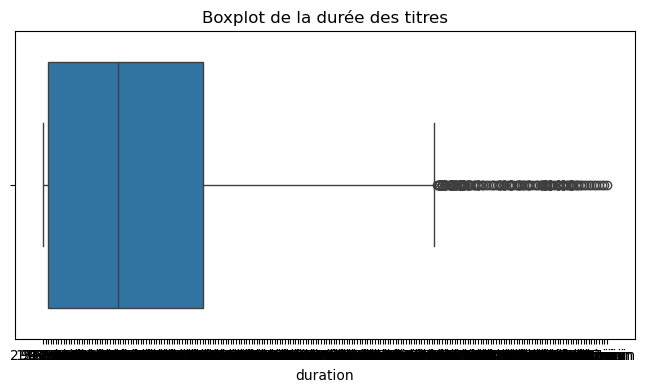

In [27]:
# 13. Boxplot d'une colonne numérique (exemple fictif si disponible)
# Pas de colonne numérique utile, mais si une durée est présente :
if 'duration' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['duration'])
    plt.title('Boxplot de la durée des titres')
    plt.show()

In [28]:
# 14. Détection des outliers avec IQR (si applicable)
# Exemple avec la colonne duration si convertie en nombre
if 'duration' in df.columns and df['duration'].str.contains('min').any():
    df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
    Q1 = df['duration_num'].quantile(0.25)
    Q3 = df['duration_num'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['duration_num'] < Q1 - 1.5 * IQR) | (df['duration_num'] > Q3 + 1.5 * IQR)]
    print("\n14. Nombre d'outliers:", outliers.shape[0])


14. Nombre d'outliers: 2


In [29]:
#15. Suppression des outliers
df = df[~((df['duration_num'] < Q1 - 1.5 * IQR) | (df['duration_num'] > Q3 + 1.5 * IQR))]

In [30]:
# 16. Conversion de la date d'ajout en datetime
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'])
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
    df['day_added'] = df['date_added'].dt.day

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [31]:
# 17. One-hot encoding sur une colonne catégorielle (ex: type)
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [32]:
# 18. Normalisation d'une colonne numérique (ex: durée)
if 'duration_num' in df.columns:
    df['duration_norm'] = (df['duration_num'] - df['duration_num'].min()) / (df['duration_num'].max() - df['duration_num'].min())


In [33]:
# 19. Indication si une personne est majeure (fictif - pas dans ce dataset)
# On peut illustrer avec un champ fictif "age_rating" s'il existait
if 'rating' in df.columns:
    df['majeur'] = df['rating'].isin(['R', 'TV-MA', 'NC-17'])

In [34]:
# 20. Catégoriser une variable continue (ex: durée en minutes)
if 'duration_num' in df.columns:
    df['categorie_duree'] = pd.cut(df['duration_num'], bins=[0, 60, 120, 180, 300], labels=['court', 'moyen', 'long', 'très long'])


In [35]:
# 21. Créer une variable binaire si une durée dépasse la médiane
if 'duration_num' in df.columns:
    df['duree_sup_median'] = df['duration_num'] > df['duration_num'].median()

In [36]:
# Afficher les 5 premières lignes finales
print(df.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water    Rajiv Chilaka   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans    Rajiv Chilaka   
4      s5           Kota Factory    Rajiv Chilaka   

                                                cast        country  \
0                                 David Attenborough  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                 David Attenborough  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     